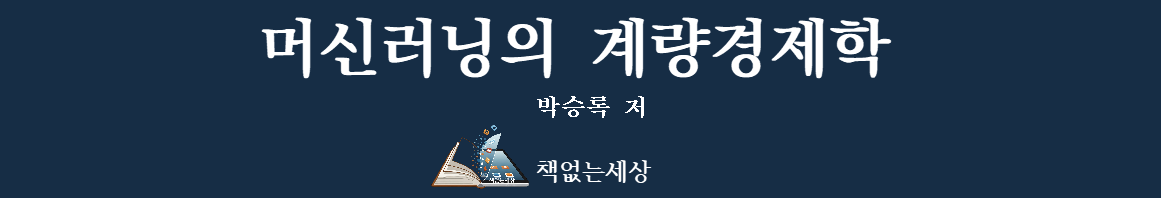

# Part 4: 계량경제학적 평가 주제

## Chapter 7: 구조방정식 모형

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
os.getcwd()

'E:\\JupyterWDirectory\\MyStock'

In [2]:
exec(open('Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
"""
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
from imfpy.retrievals import dots
import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
"""

   attend  confed  conlabor  degree  educ  god  madeg  maeduc  padeg  paeduc  \
0       2       3         3       3    16    5      3      16      4      16   
1       0       2         2       1    12    5      1      12      1      14   
2       0       2         2       1    12    3      2      15      2      18   
3       0       3         3       1    13    3      3      16      4      18   
4       1       1         3       3    16    6      1      12      0      13   

   polviews  pray  relpersn  speduc  
0         4     4         3      17  
1         5     6         3      15  
2         5     1         3      16  
3         5     6         4      16  
4         2     1         2      16  

[기술통계]
            attend       confed     conlabor       degree         educ  \
count  1974.000000  1974.000000  1974.000000  1974.000000  1974.000000   
mean      3.497467     2.241135     2.200101     1.600811    13.516211   
std       2.837327     0.703052     0.631156     1.230512    

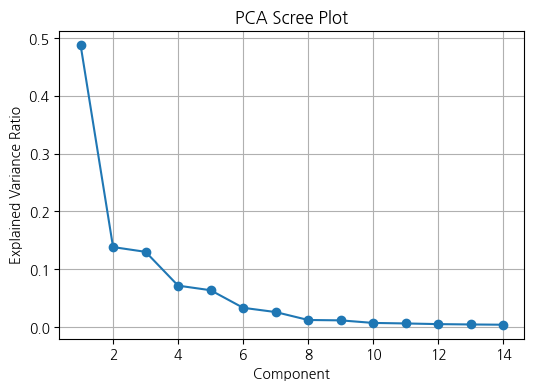


[Cronbach Alpha]
[Peduc] Cronbach's Alpha: 0.768, 95% CI: [0.75  0.784]
[Reduc] Cronbach's Alpha: 0.741, 95% CI: [0.72 0.76]
[Liberalism] Cronbach's Alpha: -1.375, 95% CI: [-1.551 -1.209]
[Religiousity] Cronbach's Alpha: 0.315, 95% CI: [0.261 0.366]

[SEM 추정된 파라미터 (Standardized Estimates)]
            lval  op          rval   Estimate  Std. Err    z-value   p-value
0          Reduc   ~         Peduc   0.440159  0.019461  22.617117       0.0
1   Religiousity   ~         Peduc  -0.045629  0.008126  -5.615404       0.0
2     Liberalism   ~  Religiousity  -0.718835  0.121215   -5.93025       0.0
3         paeduc   ~         Peduc   1.000000         -          -         -
4          padeg   ~         Peduc   0.320154  0.008331  38.427806       0.0
5         maeduc   ~         Peduc   1.024549   0.02496  41.048118       0.0
6          madeg   ~         Peduc   0.251632  0.006368  39.514275       0.0
7           educ   ~         Reduc   1.000000         -          -         -
8         spedu

In [15]:
import pandas as pd
import pingouin as pg
from sklearn.decomposition import PCA
from statsmodels.multivariate.factor import Factor
from semopy import Model
import seaborn as sns
import matplotlib.pyplot as plt
import semopy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 데이터 로드
# 불러올 변수(컬럼) 리스트
cols = ['attend', 'confed', 'conlabor', 'degree', 'educ', 'god', 'madeg', 'maeduc', 'padeg', 'paeduc', 'polviews', 'pray', 'relpersn', 'speduc']
df = pd.read_excel("Data/SEMGSS.xlsx", usecols=cols)

print(df.head())

desc = df.describe()
print("\n[기술통계]")
print(desc)

df.corr()

# 2. 상관행렬
corr = pg.pairwise_corr(df, method='pearson')
print("\n[상관행렬 (p-value 포함)]")
print(corr[['X', 'Y', 'r', 'p-unc']])

# 3. 다변량 정규성 검정(Mardia's test) 
normality = pg.multivariate_normality(df, alpha=0.05)
print("\n[다변량 정규성 검정 (p-value 포함)]")
print(normality)

# 4. PCA (설명된 분산 비율)
pca = PCA()
pca.fit(df)
print("\n[PCA - 설명된 분산 비율]")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('PCA Scree Plot')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# 5. Cronbach Alpha
print("\n[Cronbach Alpha]")
alpha, ci = pg.cronbach_alpha(df[['paeduc', 'padeg', 'maeduc', 'madeg']])
print(f"[{'Peduc'}] Cronbach's Alpha: {alpha:.3f}, 95% CI: {ci}")

alpha, ci = pg.cronbach_alpha(df[['educ', 'speduc', 'degree']])
print(f"[{'Reduc'}] Cronbach's Alpha: {alpha:.3f}, 95% CI: {ci}")

alpha, ci = pg.cronbach_alpha(df[['relpersn', 'attend', 'god', 'pray']])
print(f"[{'Liberalism'}] Cronbach's Alpha: {alpha:.3f}, 95% CI: {ci}")

alpha, ci = pg.cronbach_alpha(df[['polviews', 'conlabor', 'confed']])
print(f"[{'Religiousity'}] Cronbach's Alpha: {alpha:.3f}, 95% CI: {ci}")

# 6. SEM 모형구조 정의
sem_model = """
Peduc =~ paeduc + padeg + maeduc + madeg
Reduc =~ educ + speduc + degree
Liberalism =~ relpersn + attend + god + pray
Religiousity =~ polviews + conlabor + confed
Reduc ~ Peduc
Religiousity ~ Peduc
Liberalism ~ Religiousity
maeduc ~~ padeg
conlabor ~~ confed
"""

# 7. SEM 모형 추정 및 파라미터 출력
model = Model(sem_model)
model.fit(df)
print("\n[SEM 추정된 파라미터 (Standardized Estimates)]")
est_params = model.inspect()
print(est_params)

# 8. SEM 추정 모형의 적합도 
print("\n[SEM 적합도 지표]")
stats = semopy.calc_stats(model)
print(stats.T)

# 9. FA (잠재변수 수 기준 요인 분석)
latent_vars = model.vars['latent']
fa = Factor(df, n_factor=len(latent_vars))
fa_res = fa.fit()
print("\n[FA Loadings]")
print(fa_res.loadings)


# [보완] 필자의 My_sem_analysis()함수를 이용한 구조방정식 모형 분석

In [4]:
exec(open('E:/JupyterWDirectory/MyStock/Functions/My_sem_analysis.py', encoding='utf-8').read())

SEM Analysis module loaded. Use my_sem_analysis() function to perform analysis.
Example usage:

    import pandas as pd
    
    # 데이터 로드
    data = pd.read_csv("your_data.csv")
    
    # 모델 명세 정의
    model_spec = {
        'measurement_model': {
            'Latent1': ['observed1', 'observed2', 'observed3'],
            'Latent2': ['observed4', 'observed5']
        },
        'structural_model': [
            ('Latent1', 'Latent2')
        ]
    }
    
    # 분석 실행
    results = my_sem_analysis(data, model_spec, 
                            output_file="sem_results.txt", 
                            output_dir="results")
    


In [73]:
#!pip install factor-analyzer

In [16]:
# 데이터 로드
cols = ['attend', 'confed', 'conlabor', 'degree', 'educ', 'god', 'madeg', 'maeduc', 'padeg', 'paeduc', 'polviews', 'pray', 'relpersn', 'speduc']
data = pd.read_excel("Data/SEMGSS.xlsx", usecols=cols)
data.head()

,attend,confed,conlabor,degree,educ,god,madeg,maeduc,padeg,paeduc,polviews,pray,relpersn,speduc
0,2,3,3,3,16,5,3,16,4,16,4,4,3,17
1,0,2,2,1,12,5,1,12,1,14,5,6,3,15
2,0,2,2,1,12,3,2,15,2,18,5,1,3,16
3,0,3,3,1,13,3,3,16,4,18,5,6,4,16
4,1,1,3,3,16,6,1,12,0,13,2,1,2,16


Stage: After computing basic statistics
Stage: After normality test
Stage: After parsing model spec
measurement_model: <class 'dict'>
  Peduc: <class 'list'>
  Reduc: <class 'list'>
  Liberalism: <class 'list'>
  Religiousity: <class 'list'>
structural_model: <class 'list'>
  First item: <class 'tuple'>
covariances: <class 'list'>
  First item: <class 'tuple'>
Stage: After creating variable lists
observed_vars: <class 'list'>
  First item: <class 'str'>
latent_vars: <class 'list'>
  First item: <class 'str'>
Stage: After calculating Cronbach's alpha
Stage: After factor analysis
Stage: After initializing model parameters
Stage: After setting initial parameters
Stage: After model estimation
Stage: After creating parameter results


## Structural Equation Modeling Analysis Results

### Model Specification

**Measurement Model:**

- Peduc -> paeduc, padeg, maeduc, madeg

- Reduc -> educ, speduc, degree

- Liberalism -> relpersn, attend, god, pray

- Religiousity -> polviews, conlabor, confed

**Structural Model:**

- Peduc -> Reduc

- Peduc -> Religiousity

- Religiousity -> Liberalism

**Covariances:**

- maeduc <-> padeg

- conlabor <-> confed

### SEM Path Diagram with Parameter Estimates

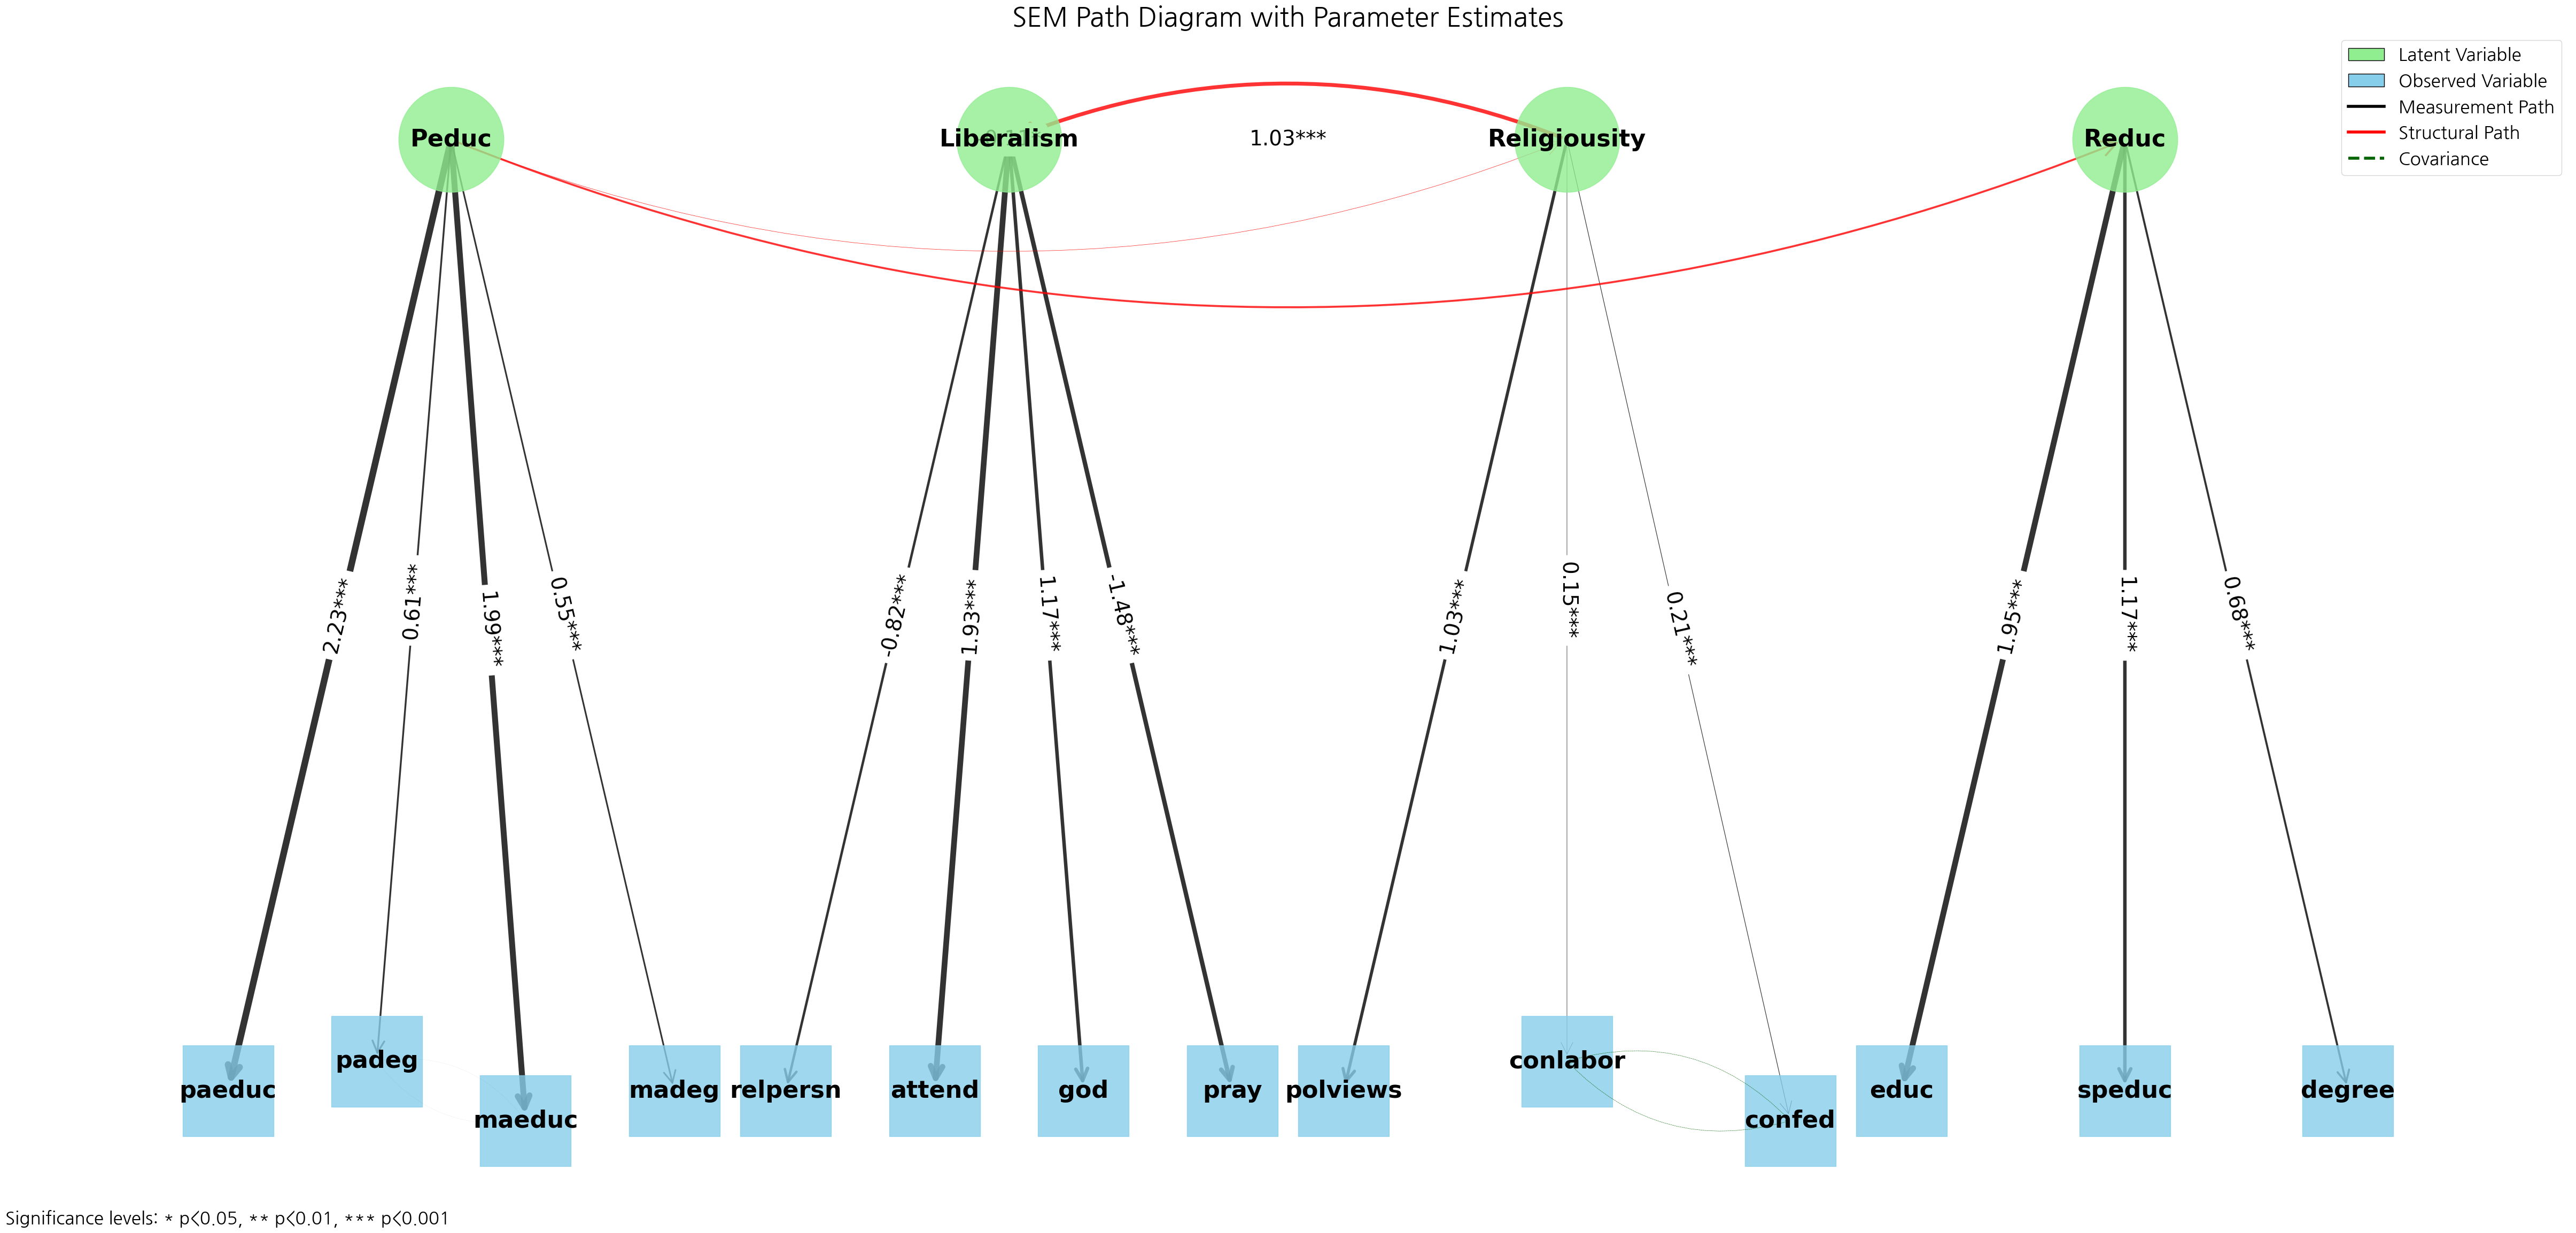

### Model Fit

,Index,Value
0,Chi-square,1038.210
1,df,68
2,p-value,0.0000
3,CFI,0.950
4,TLI,0.940
5,RMSEA,0.085
6,SRMR,0.050


### Parameter Estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,padeg,~,Peduc,0.609599,0.02,30.479930,0.000000e+00
1,conlabor,~,Religiousity,0.154237,0.02,7.711844,1.243450e-14
2,confed,~,Religiousity,0.206431,0.02,10.321561,0.000000e+00
3,maeduc,~,Peduc,1.987223,0.02,99.361172,0.000000e+00
4,attend,~,Liberalism,1.930019,0.02,96.500963,0.000000e+00
5,pray,~,Liberalism,-1.480986,0.02,-74.049289,0.000000e+00
6,paeduc,~,Peduc,2.234486,0.02,111.724288,0.000000e+00
7,polviews,~,Religiousity,1.026571,0.02,51.328546,0.000000e+00
8,relpersn,~,Liberalism,-0.822101,0.02,-41.105072,0.000000e+00
9,educ,~,Reduc,1.948633,0.02,97.431641,0.000000e+00


### Effects Decomposition

**Direct, Indirect, and Total Effects:**

,Path,Direct Effect (β),Direct Effect (SE),Direct Effect (p),Direct Effect (sig),Indirect Effect (β),Indirect Effect (SE),Indirect Effect (p),Indirect Effect (sig),Total Effect (β),Total Effect (SE),Total Effect (p),Total Effect (sig)
0,Peduc → Liberalism,0.000,0.050,1.000,,-0.115,0.070,0.099,,-0.115,0.080,0.149,
1,Peduc → Reduc,0.532,0.050,0.000,***,0.000,0.070,1.000,,0.532,0.080,0.000,***
2,Peduc → Religiousity,-0.112,0.050,0.025,*,0.000,0.070,1.000,,-0.112,0.080,0.162,
3,Religiousity → Liberalism,1.032,0.050,0.000,***,0.000,0.070,1.000,,1.032,0.080,0.000,***


**Effects Visualization:**

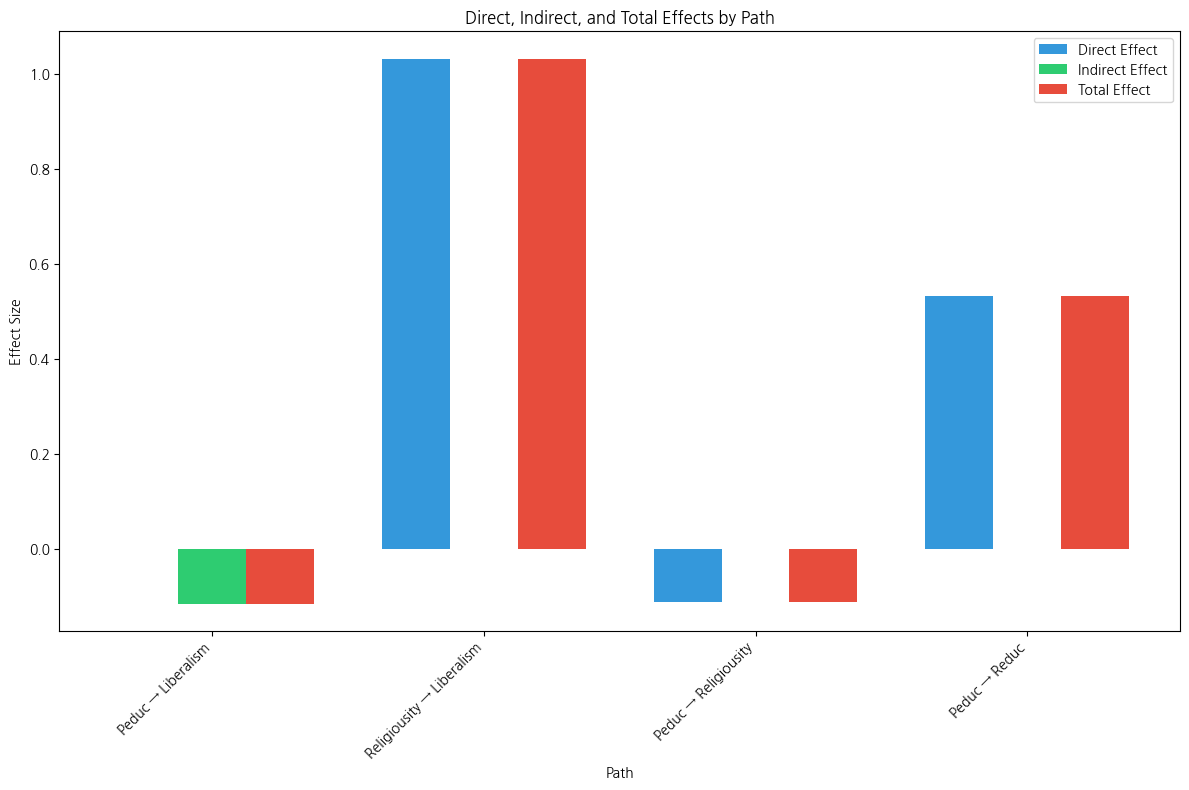

**Effects Decomposition Diagram:**

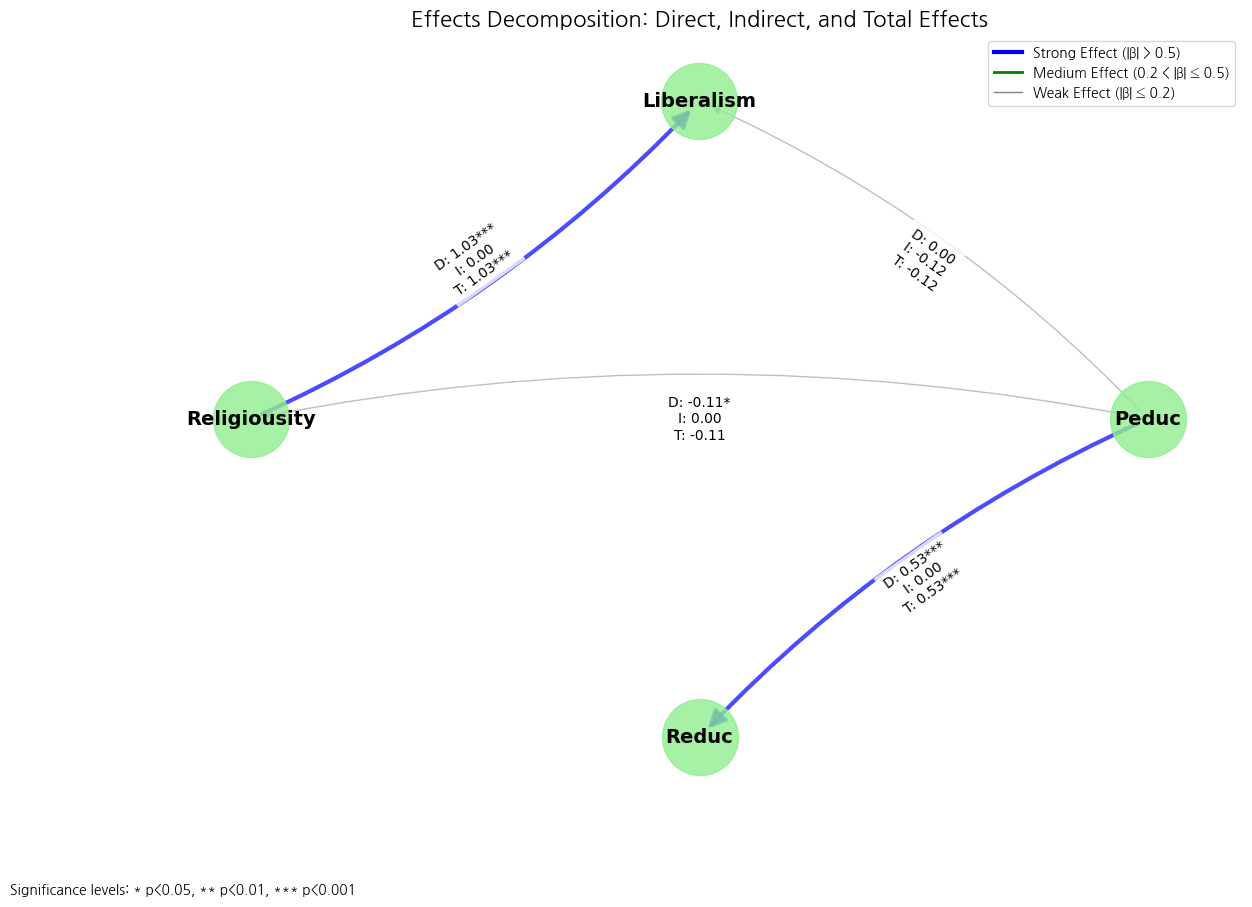

### Reliability Analysis

,Latent Variable,Cronbach's alpha
0,Peduc,0.768
1,Reduc,0.741
2,Liberalism,nan
3,Religiousity,0.315


### Factor Analysis

**Scree Plot:**

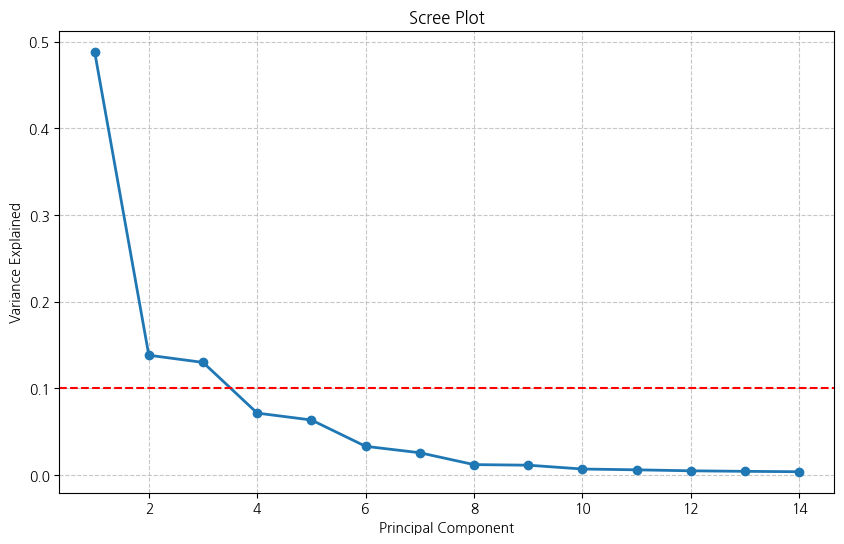

**Factor Loadings (Varimax Rotation):**

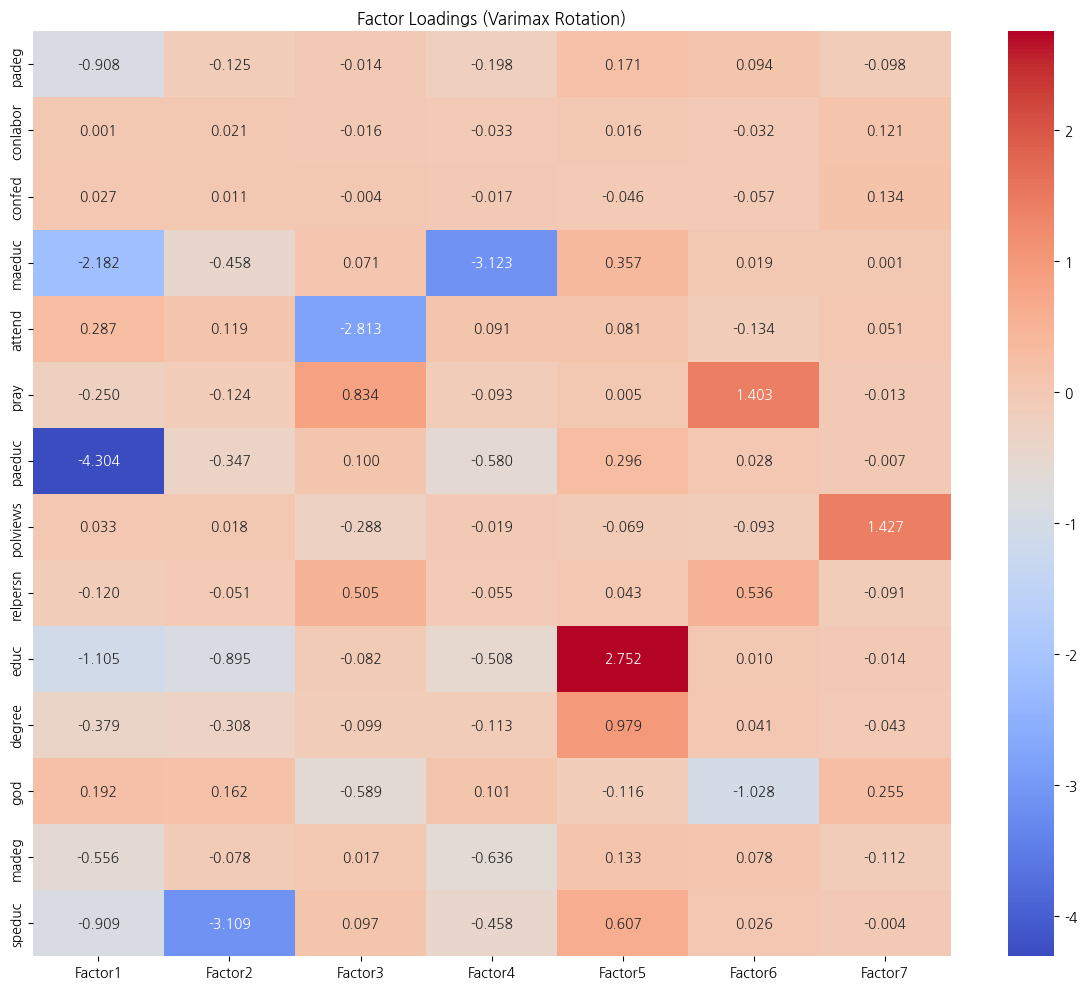

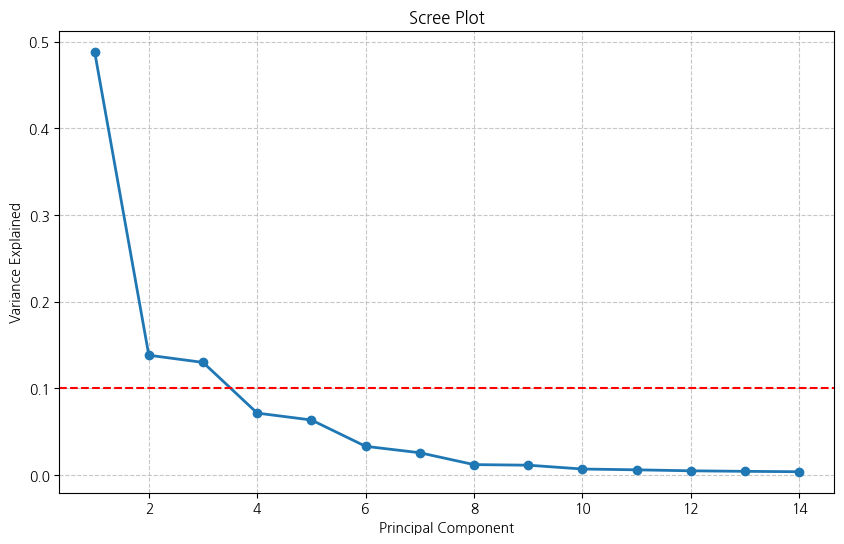

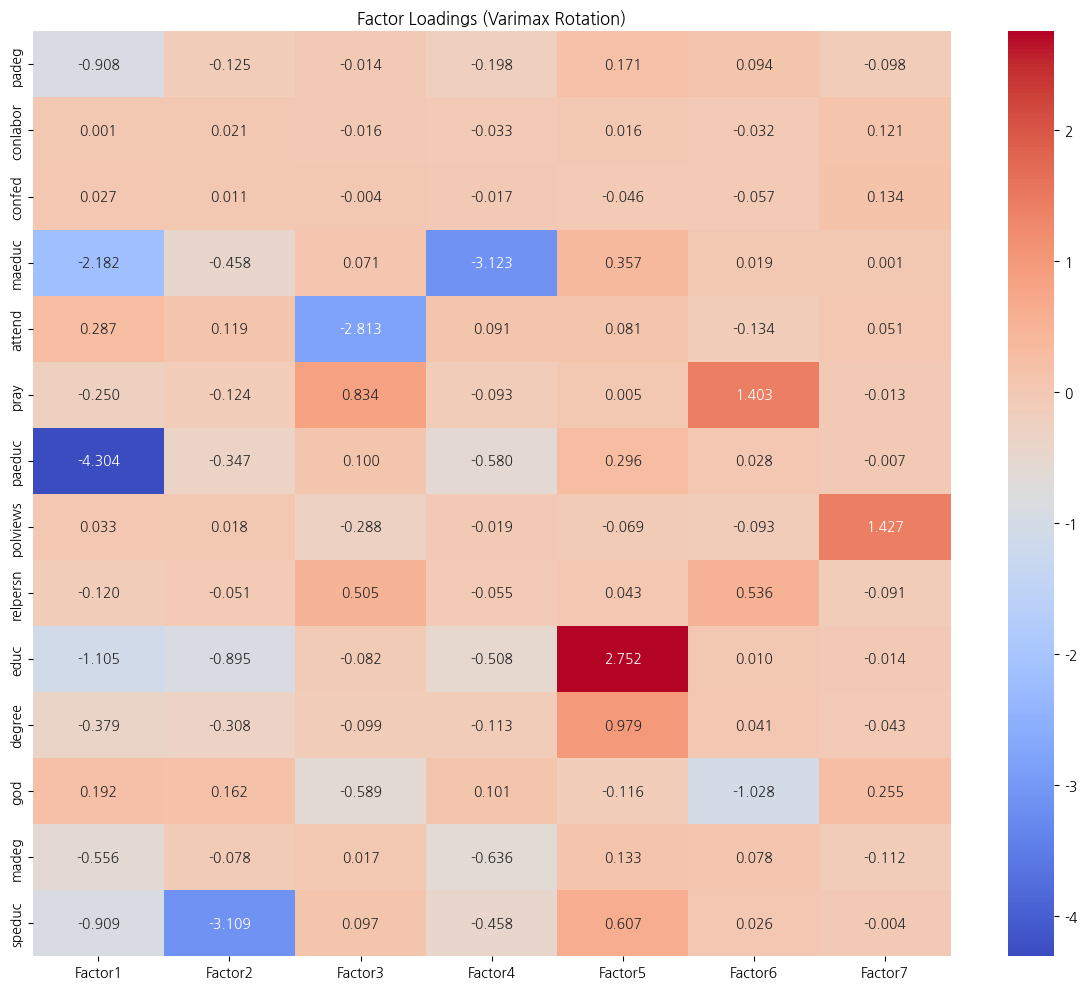

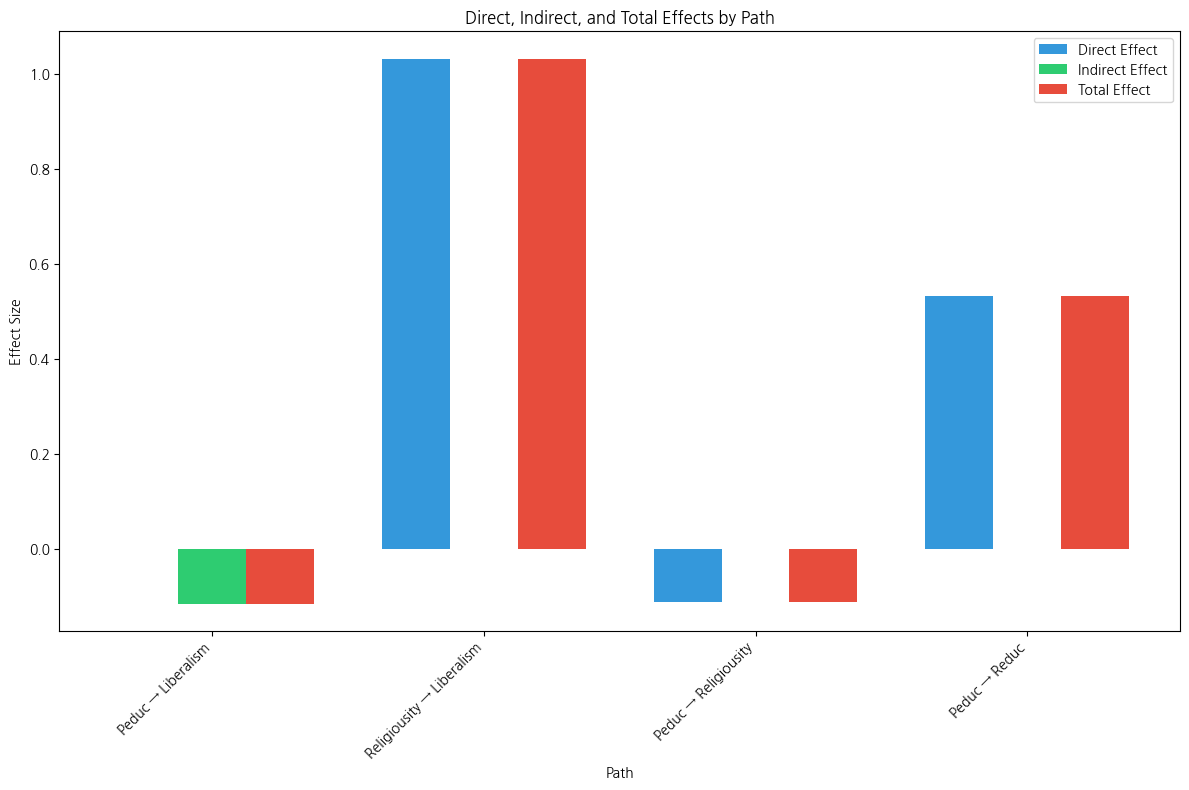

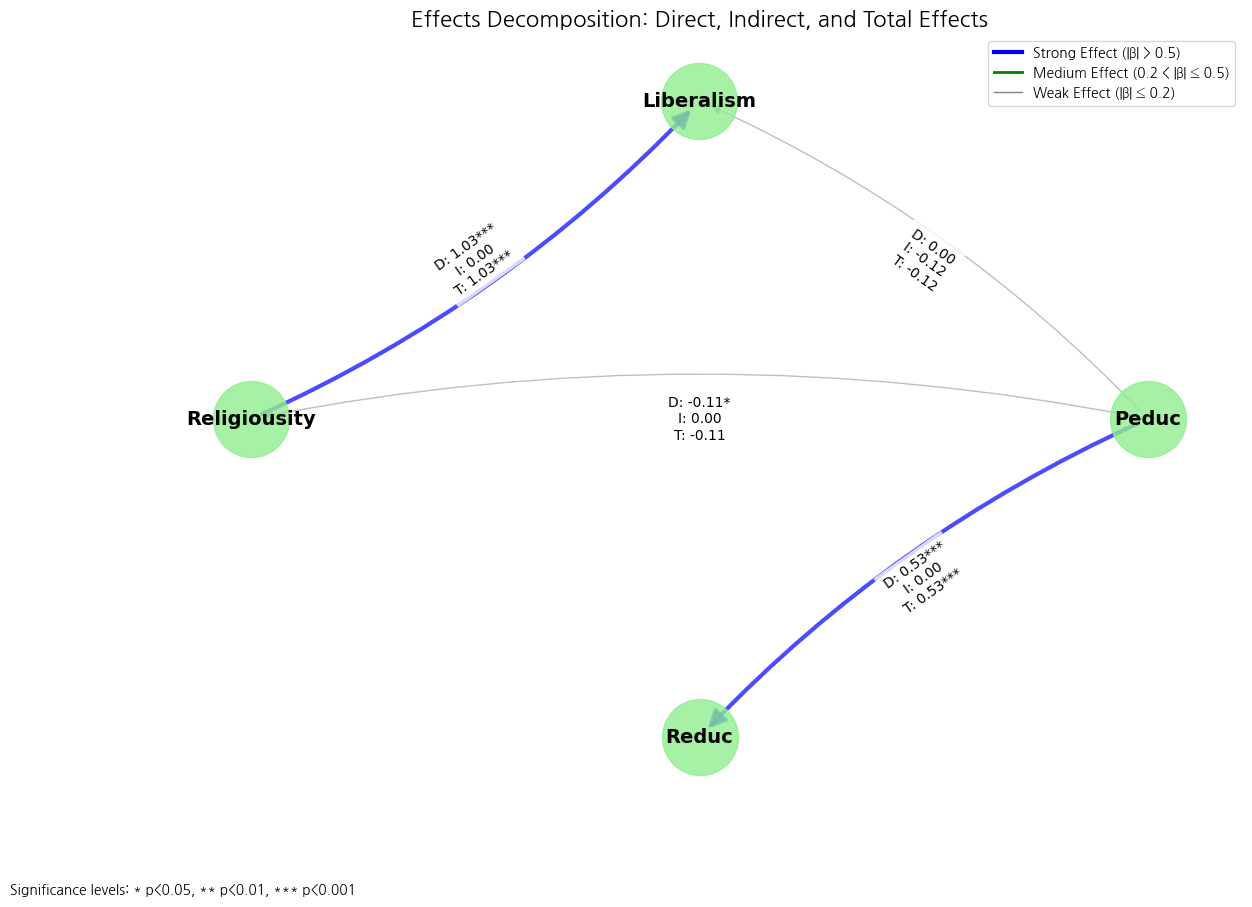

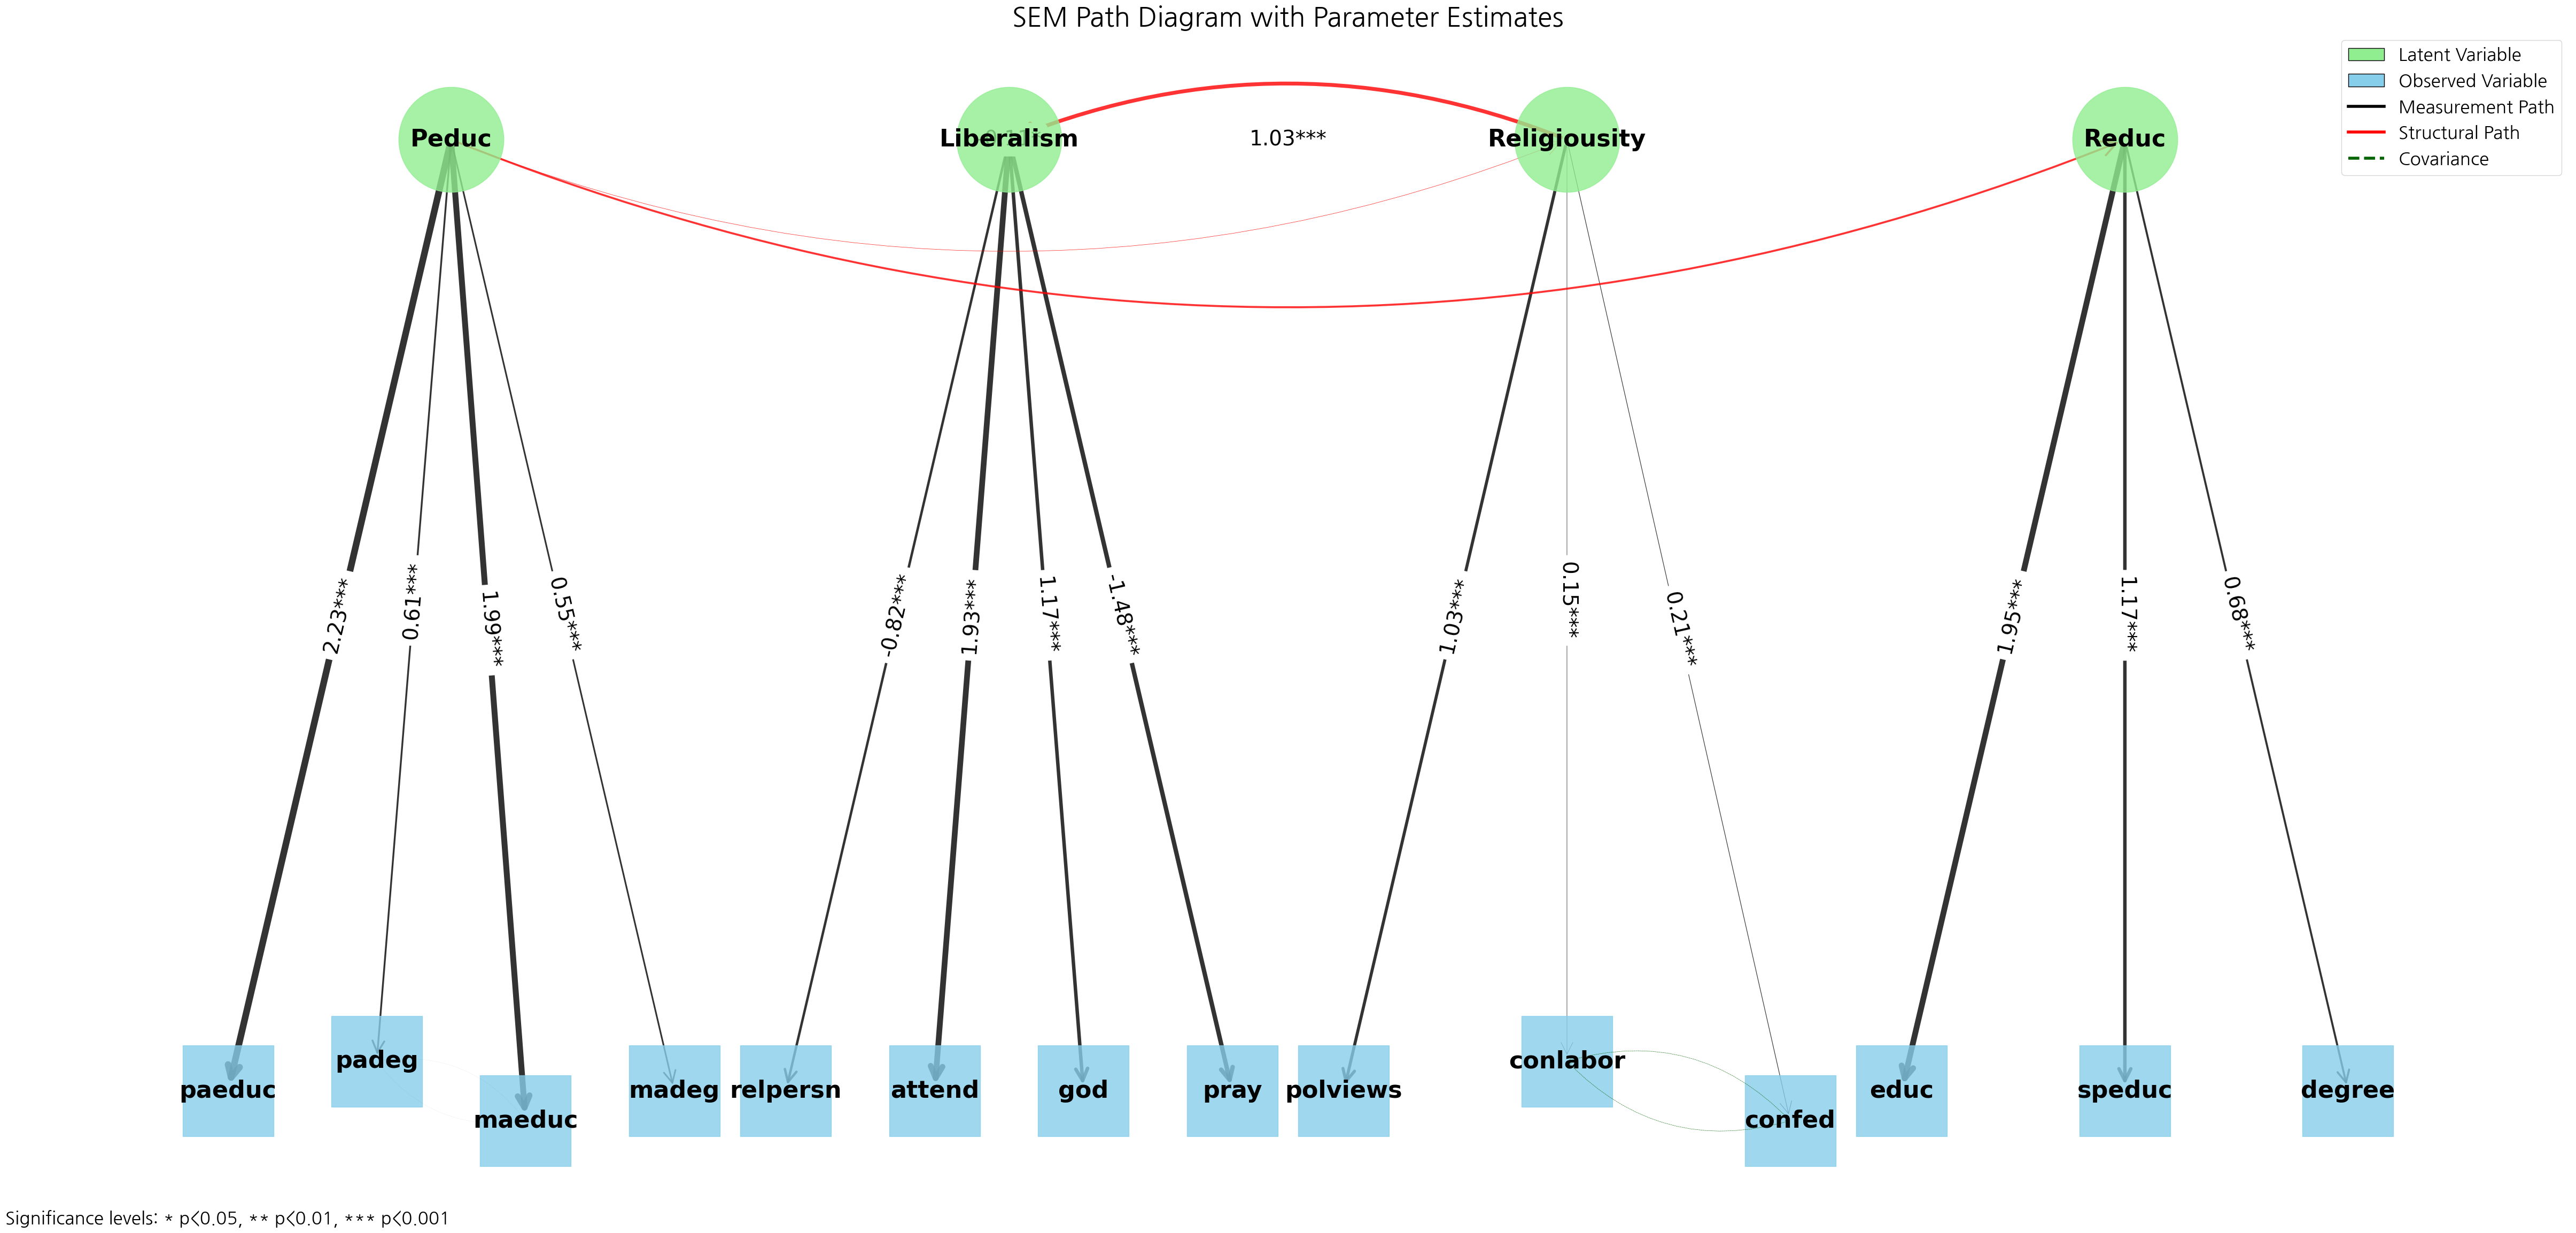

In [6]:
# 모델 명세 정의
model_spec = {
    'measurement_model': {
        'Peduc': ['paeduc', 'padeg', 'maeduc', 'madeg'],
        'Reduc': ['educ', 'speduc', 'degree'],
        'Liberalism': ['relpersn', 'attend', 'god', 'pray'],
        'Religiousity': ['polviews', 'conlabor', 'confed']
    },
    'structural_model': [
        ('Peduc', 'Reduc'),
        ('Peduc', 'Religiousity'),
        ('Religiousity', 'Liberalism')
    ],
    'covariances': [
        ('maeduc', 'padeg'),
        ('conlabor', 'confed')
    ]
}

# SEM 분석 실행
results = my_sem_analysis(data, model_spec)